In [1]:
# modules we'll use
import pandas as pd
import numpy as np

# helpful character encoding module
import chardet

In [2]:
f= open("regenerative.txt","r+",encoding="utf8")
text = f.read()
# Extract the plain text content of the page


# Clean text
text = text.strip(" ")
text = text.replace('\n', ' ')
text = text.replace('\t', ' ')

text = text[3:]
print (len(text))
# Print text
print (text.split(" "))


184154
['', 'POSITIVE', 'MOVEMENT', '', '', 'THE', 'REGENERATIVE', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'BUSINESS', 'HANDBOOK', '', '', '', 'A', 'practical', 'guide', 'empowering', 'companies', 'and', 'leaders', 'to', 'unleash', 'positive', 'impact', 'and', 'deliver', 'systemic', 'change.', '', '', '', '', '', '', 'The', 'Regenerative', 'Business', 'Handbook', 'A', 'practical', 'guide', 'to', 'empower', 'companies', 'and', 'leaders', 'to', 'unleash', 'positive', 'impact', 'and', 'deliver', 'systemic', 'change.', '', '', 'First', 'edition,', 'Copyright', '©', 'September', '2020.', '', 'The', 'Positive', 'Movement', '-', 'postv.net', '', 'Editorial', 'Team', 'Stephen', 'Vasconcellos', '-', '', 'Founder,', 'Positive', 'Niels', 'de', 'Fraguier', '-', 'Founder,', 'CEO,', 'Positive', 'Laurie', 'Barat', '-', 'Contributor,', 'Founder,', 'Dendropolis', 'Mathias', 'Barat', '-', 'Contributor,', 'Founder,', 'Dendropolis', 'Sidney', 'Rostan', '-', 'Contributor,', 'Fou

In [3]:
print (len(text))

184154


In [4]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

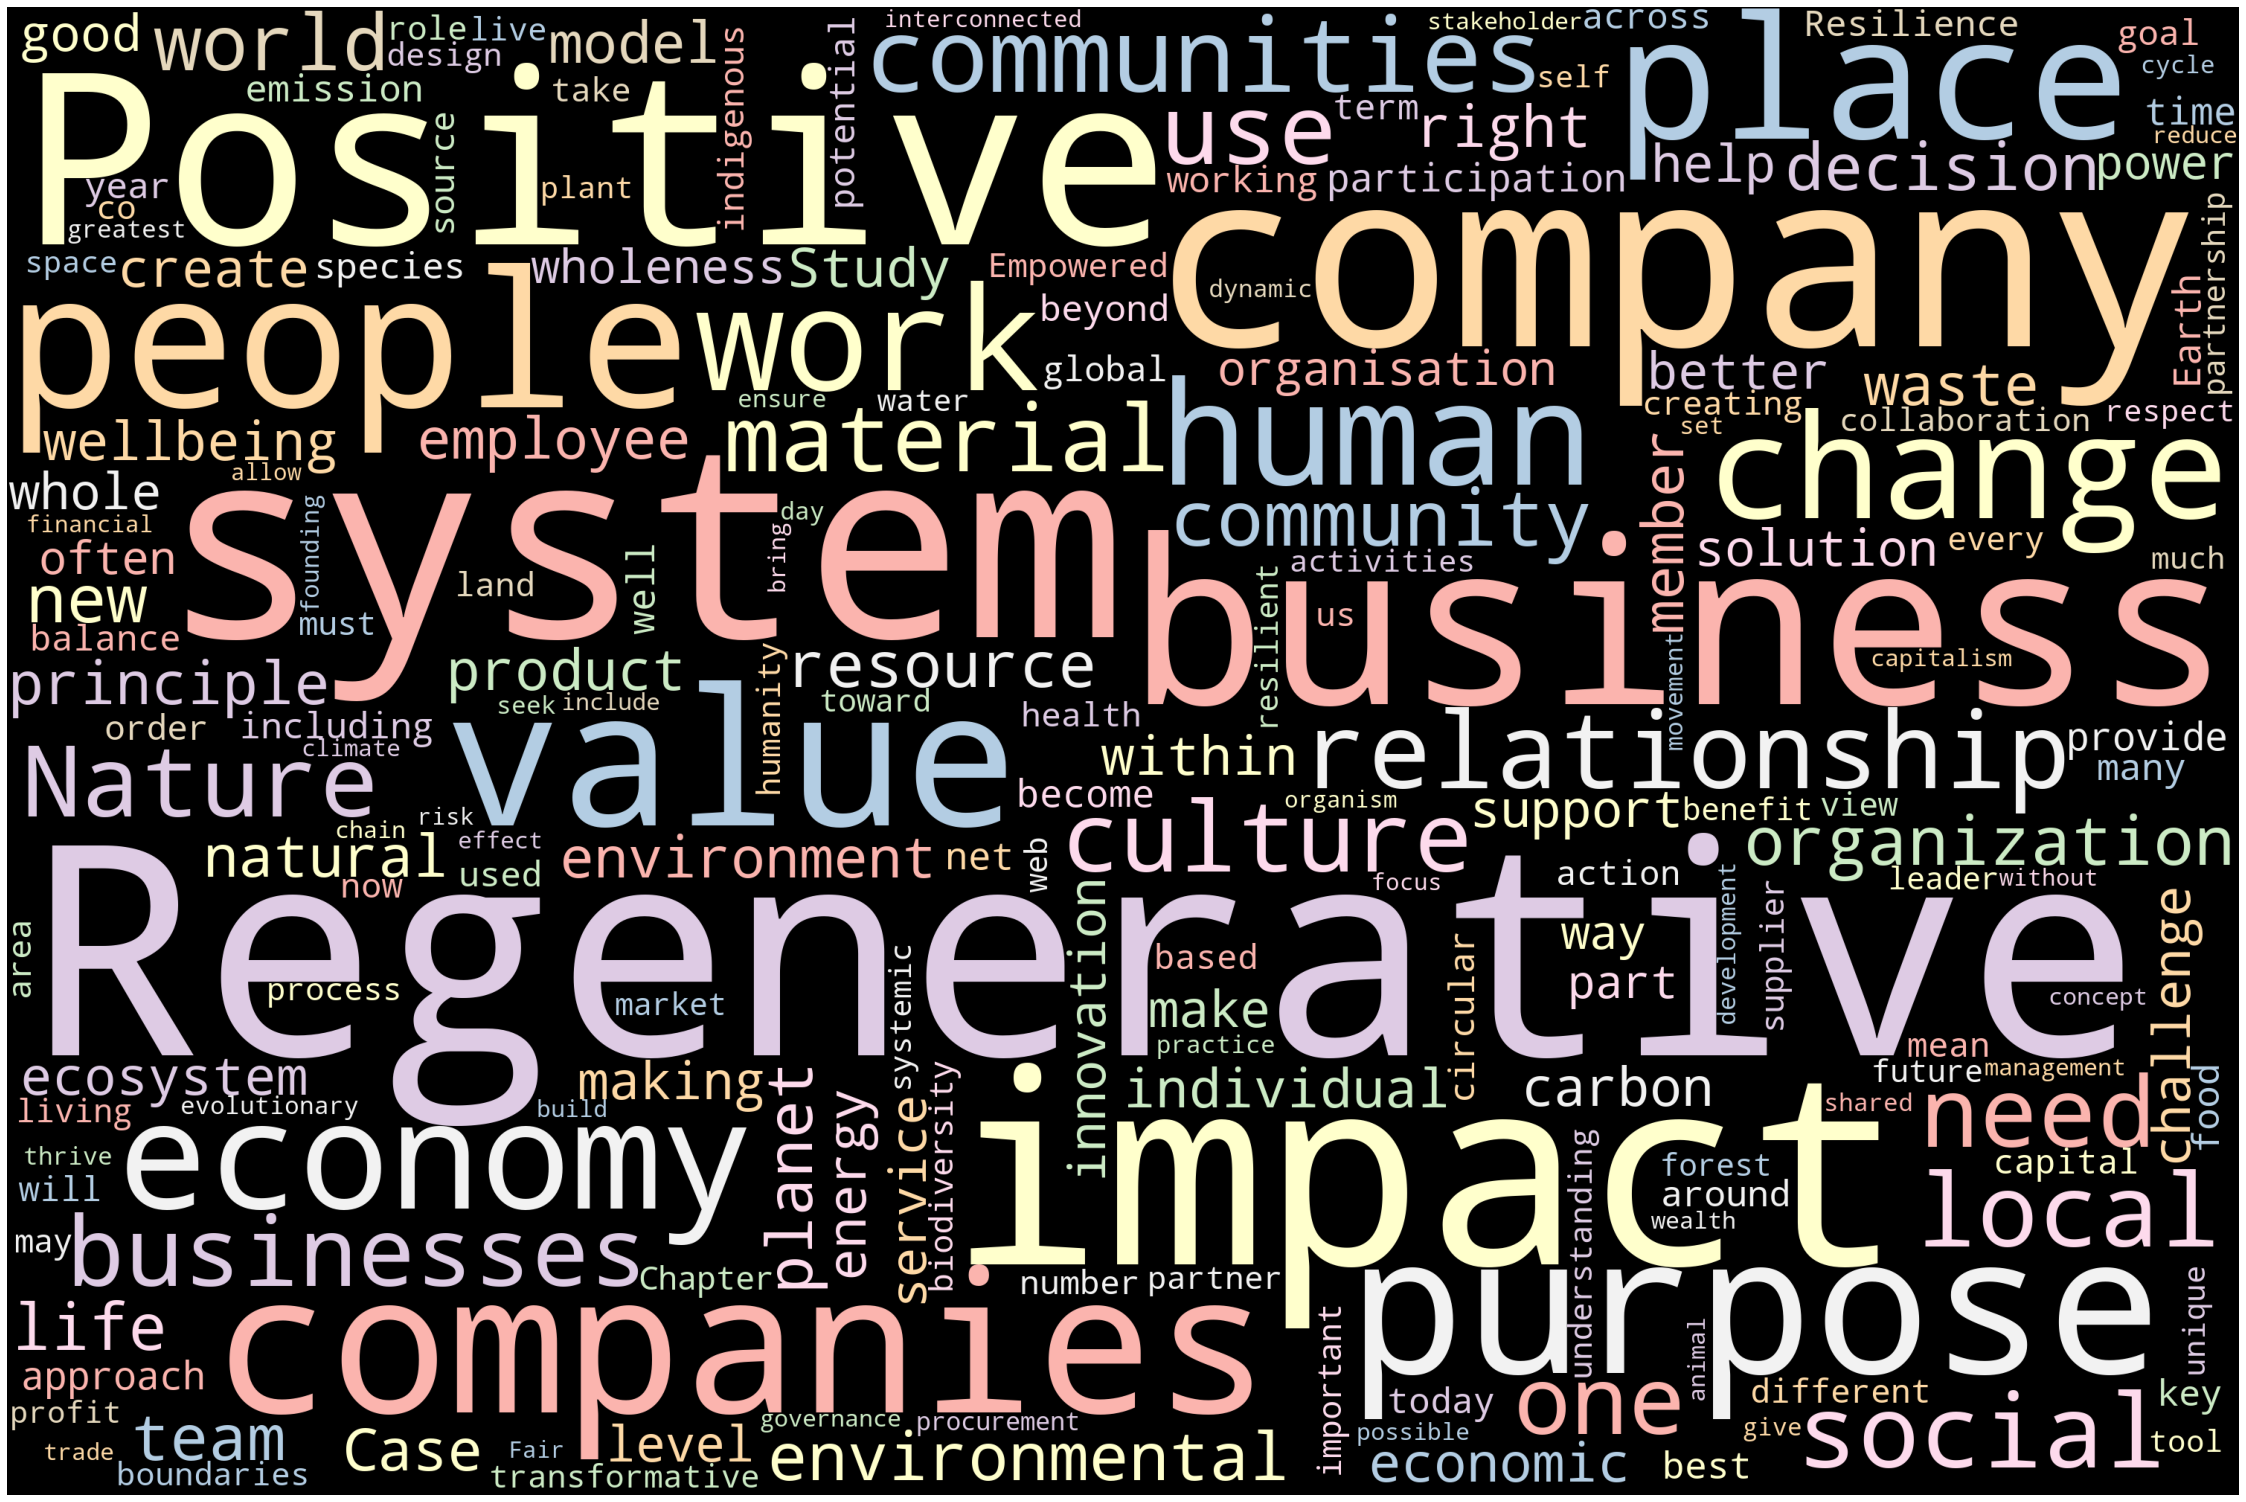

In [5]:
# Import package
from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)

# Plot
plot_cloud(wordcloud)

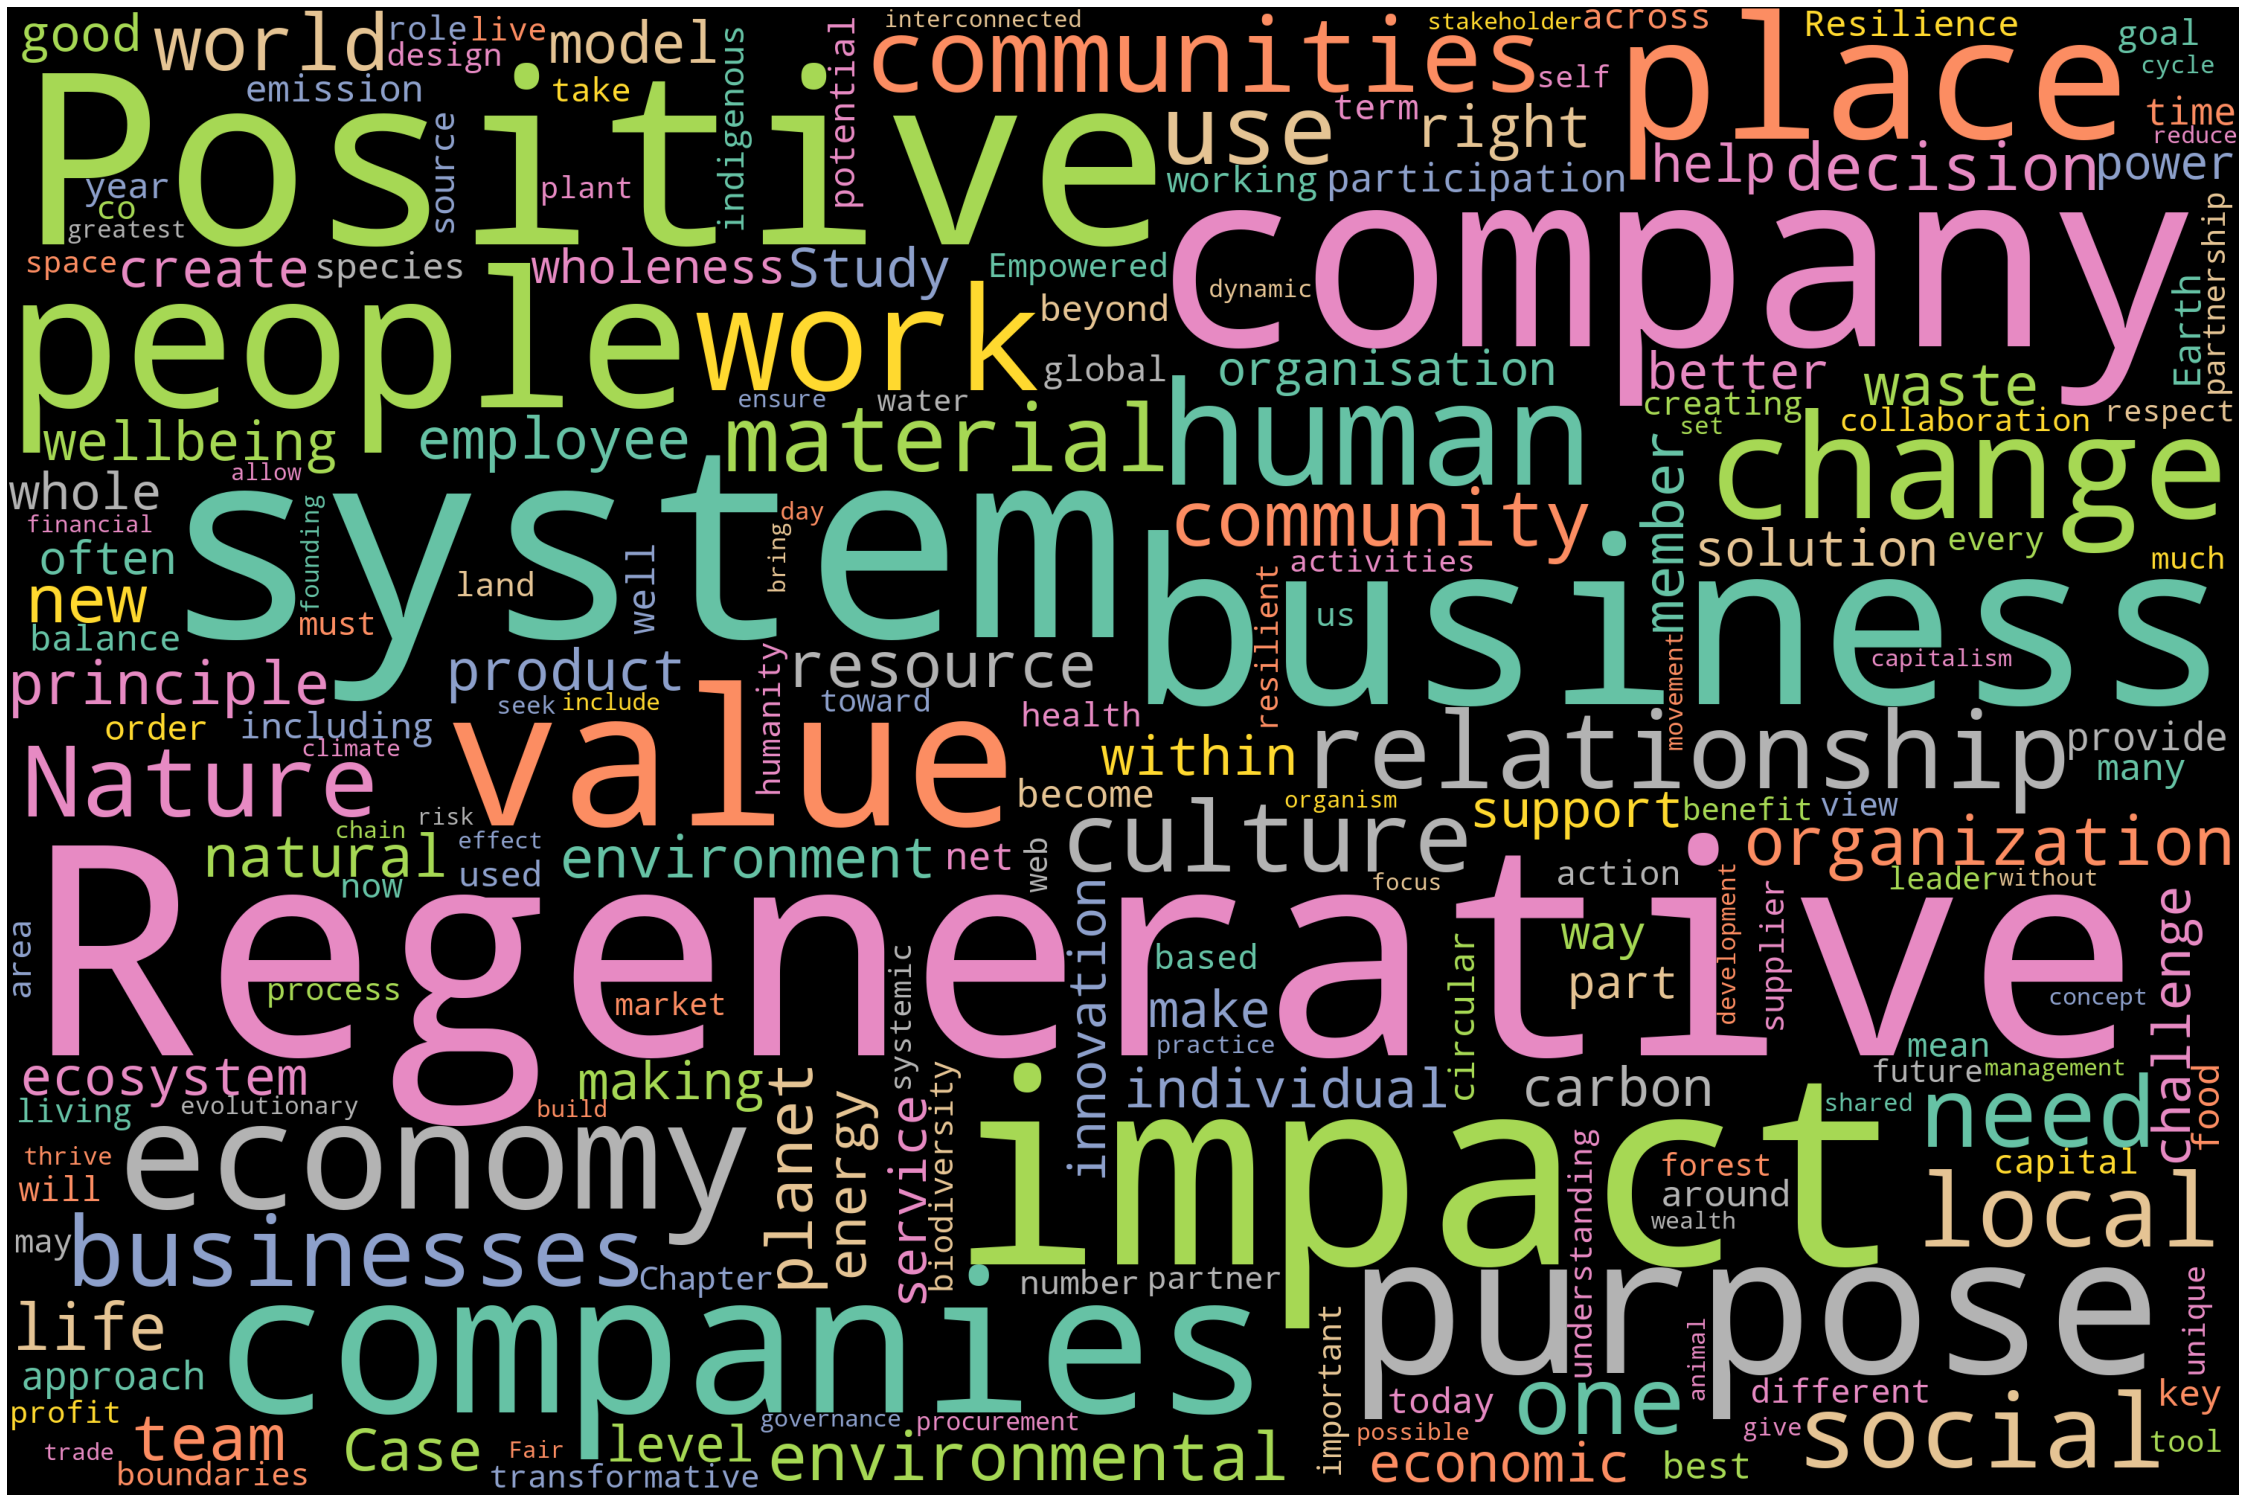

In [6]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)

# Plot
plot_cloud(wordcloud)

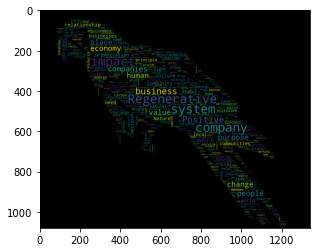

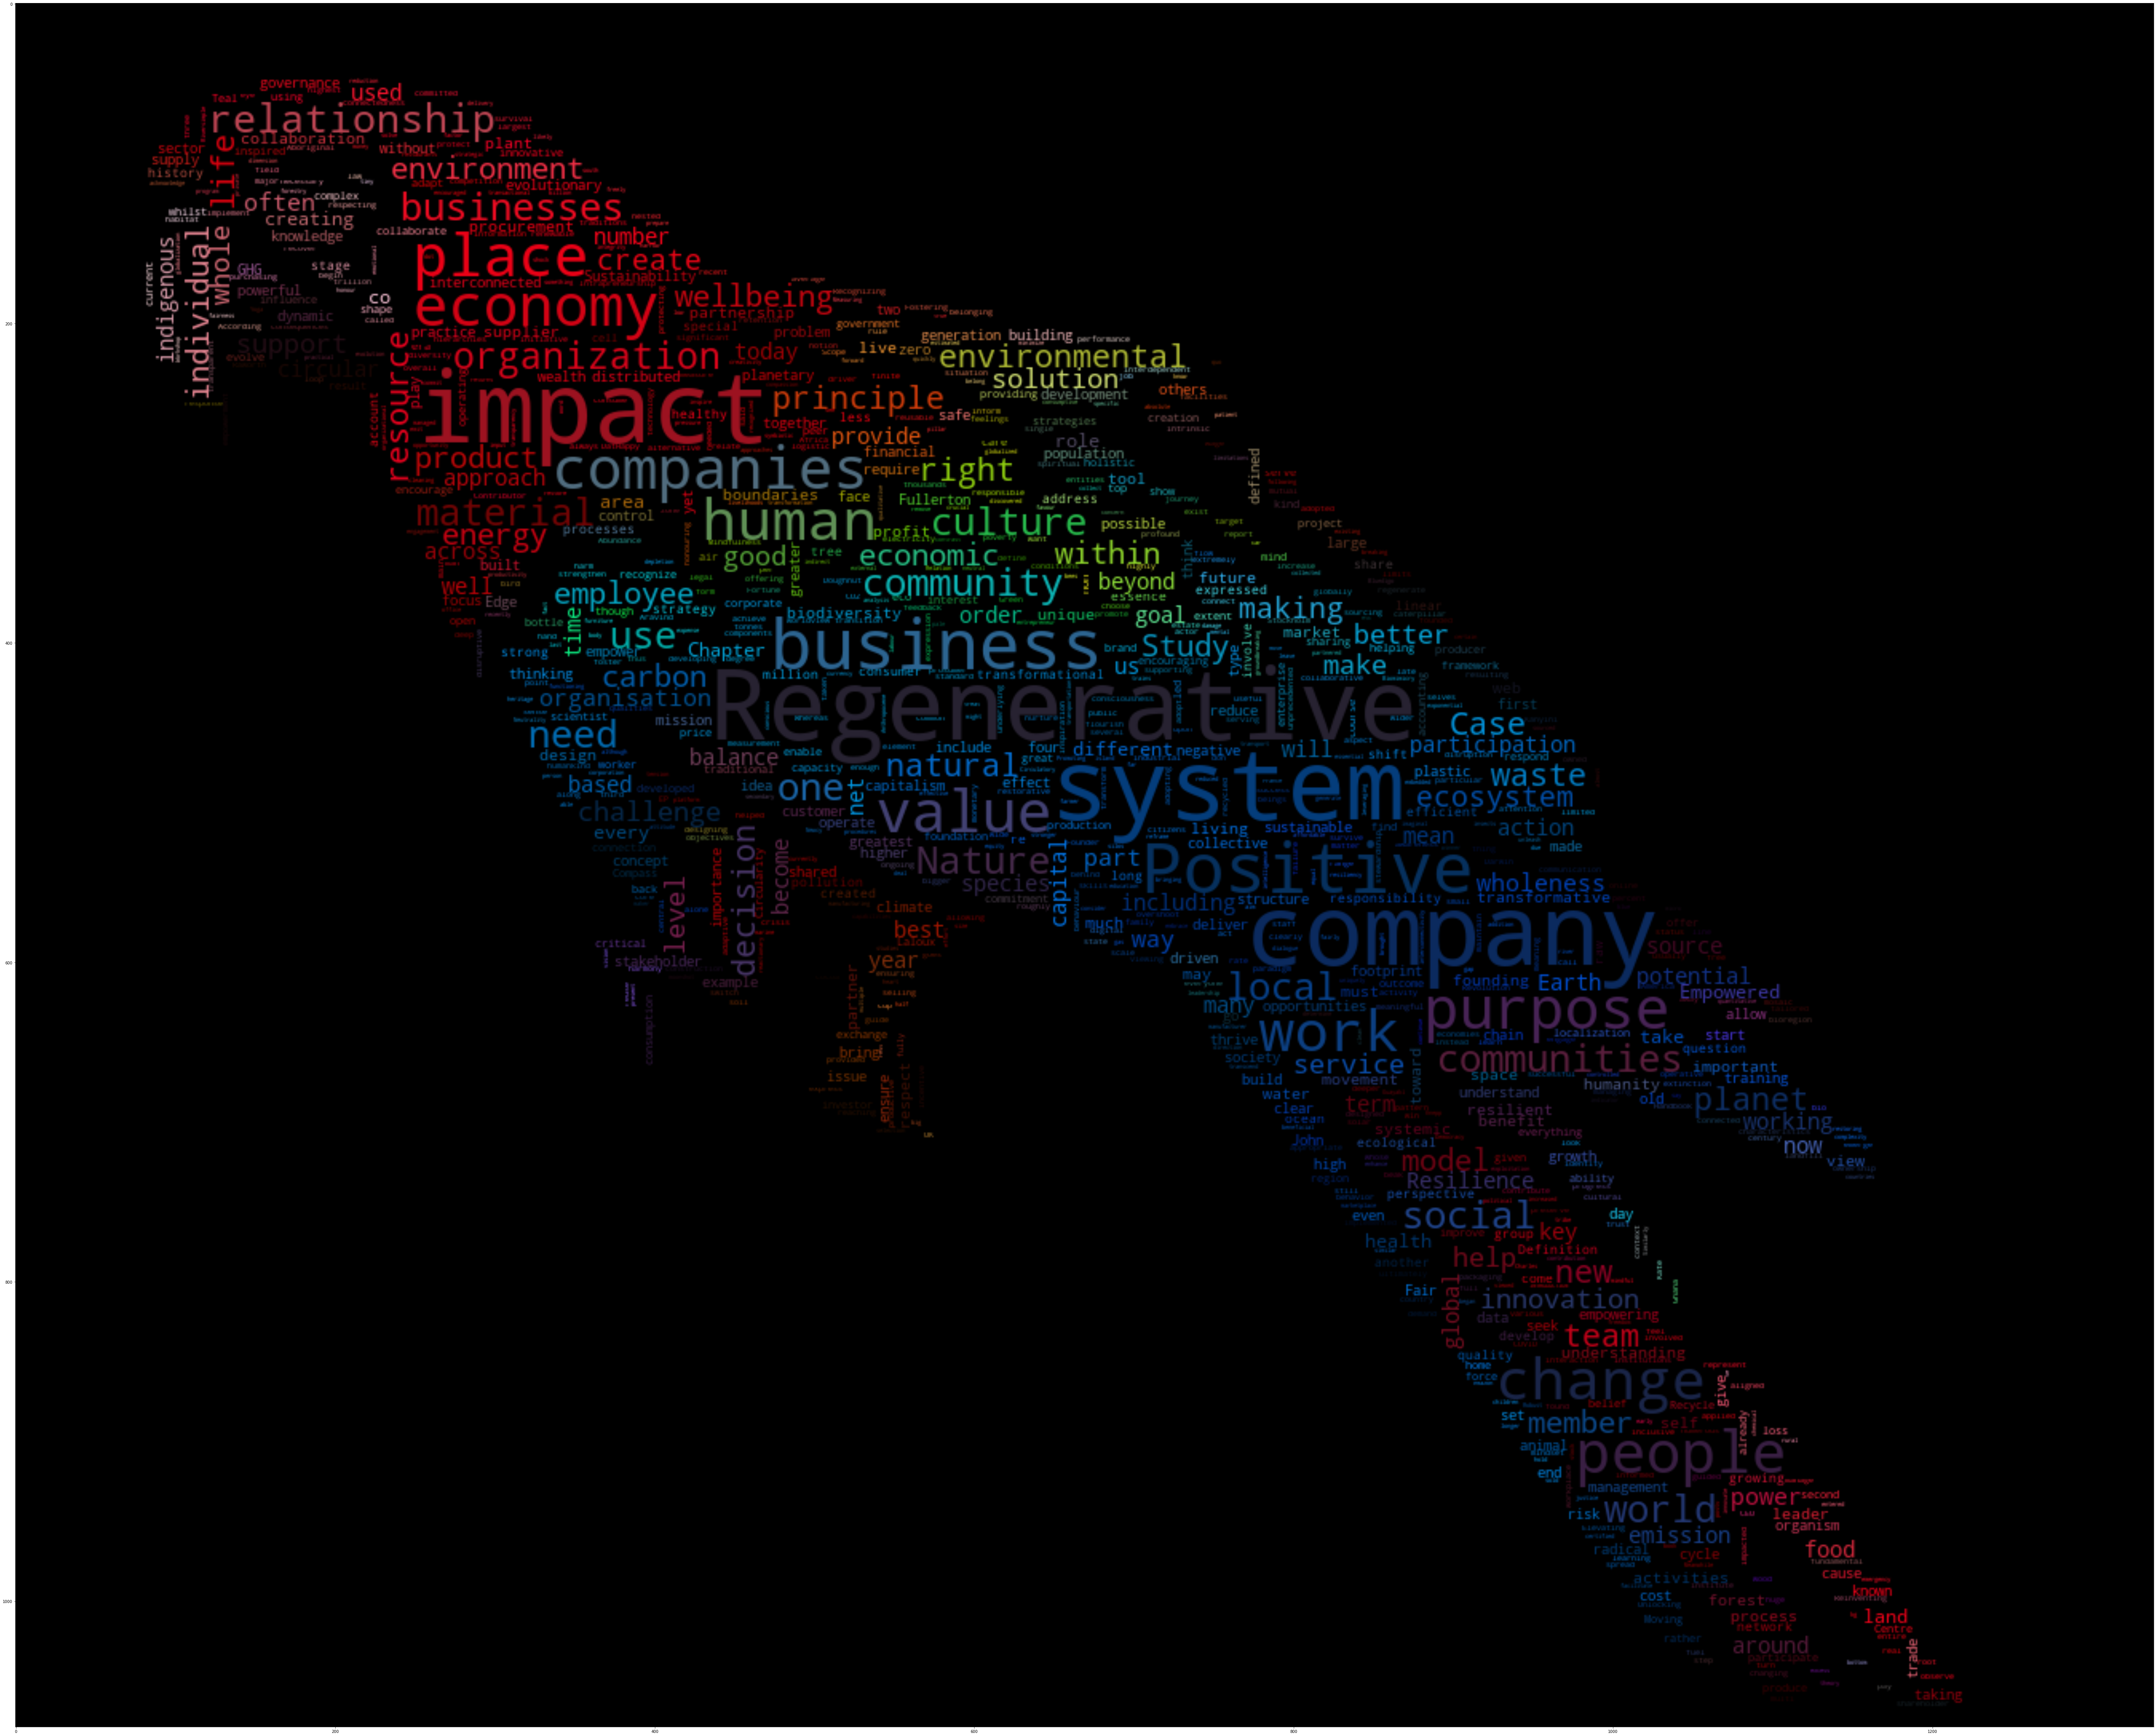

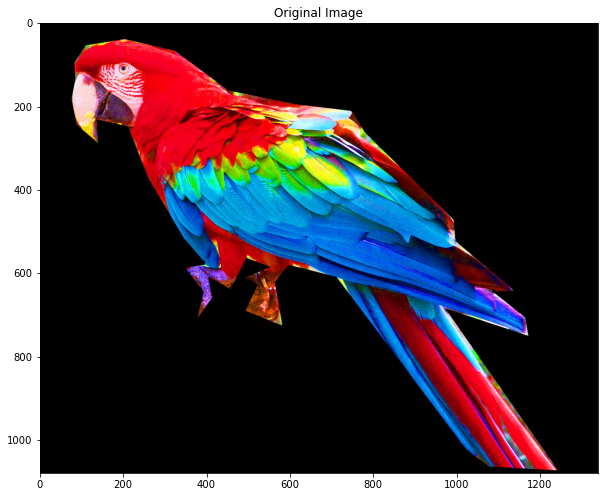

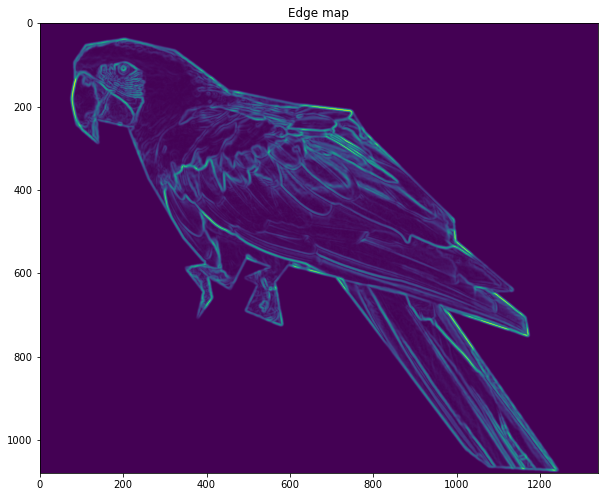

In [14]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
#text = open(os.path.join(d, 'wiki_rainbow.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "parrot-by-jose-mari-gimenez2.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=1000, mask=parrot_mask, max_font_size=80, random_state=1,
               collocations=0, relative_scaling=0, stopwords = STOPWORDS)

# generate word cloud
wc.generate(text)
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(100, 100))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("regenerative_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()